<a href="https://colab.research.google.com/github/GOE84/Python-Machine_Learning/blob/main/X_ray_testtt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ ติดตั้ง Dependencies
!pip install torch torchvision matplotlib pillow

# 2️⃣ นำเข้า Library
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# 3️⃣ สร้างโมเดล MedGemma สมมติ
class MedGemmaModel(nn.Module):
    def __init__(self):
        super(MedGemmaModel, self).__init__()
        self.conv = nn.Conv2d(1, 16, 3, 1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(16*222*222, 2)  # binary classification

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.flatten(x)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

# สร้างโมเดล
model = MedGemmaModel()
model.eval()

# 4️⃣ Upload ภาพ X-ray
uploaded = files.upload()  # เลือกไฟล์จากเครื่อง
img_path = list(uploaded.keys())[0]

# 5️⃣ โหลดและแสดงภาพ
img = Image.open(img_path).convert('L')  # แปลงเป็น grayscale
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Uploaded X-ray")
plt.show()

# 6️⃣ แปลงภาพเป็น Tensor สำหรับโมเดล
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)  # เพิ่ม batch dimension

# 7️⃣ รัน MedGemma Inference
with torch.no_grad():
    output = model(img_tensor)
    pred_class = torch.argmax(output, dim=1).item()

print("ผลลัพธ์ Inference (probabilities):", output.numpy())
print("คลาสที่โมเดลทำนาย:", pred_class)

# 8️⃣ แสดงกราฟความเชื่อมั่น
classes = ['Class 0', 'Class 1']
probs = output.numpy()[0]

plt.bar(classes, probs, color=['skyblue','salmon'])
plt.ylabel("Probability")
plt.title("MedGemma Inference Confidence")
plt.show()


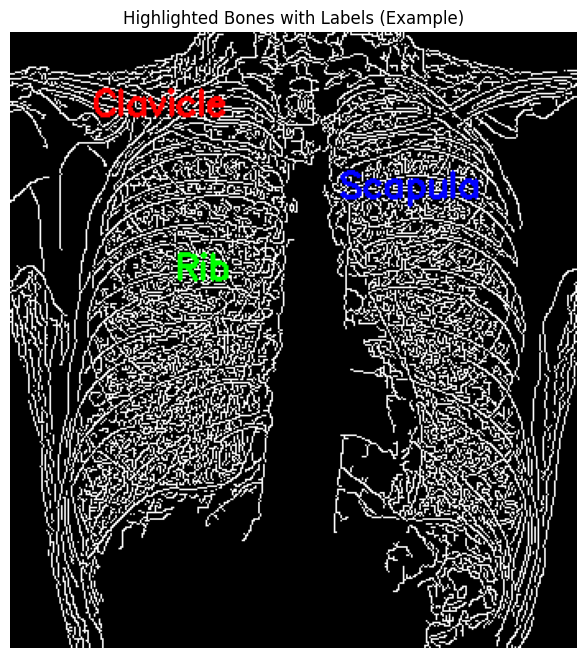

In [ ]:
import cv2
import numpy as np

# แปลง PIL image → numpy array
img_np = np.array(img)

# ใช้ Canny edge detection
edges = cv2.Canny(img_np, threshold1=30, threshold2=100)

# แปลงกลับเป็น RGB เพื่อใส่ label
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# วางชื่อกระดูก (ตัวอย่าง)
# สมมติวางตำแหน่งบางจุด
cv2.putText(edges_rgb, "Clavicle", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
cv2.putText(edges_rgb, "Rib", (100,150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
cv2.putText(edges_rgb, "Scapula", (200,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

plt.figure(figsize=(8,8))
plt.imshow(edges_rgb)
plt.axis('off')
plt.title("Highlighted Bones with Labels (Example)")
plt.show()


อัปโหลดภาพ X-ray ของคุณ (PNG / JPG)...


Saving ddca3f92-4b8e-4672-bb6b-f3594ad4e304-thumb.jpg to ddca3f92-4b8e-4672-bb6b-f3594ad4e304-thumb (1).jpg


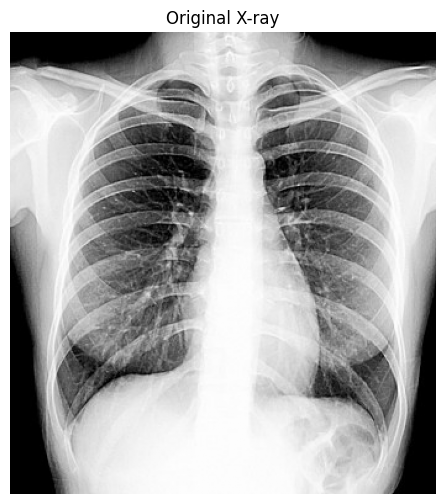

ผลลัพธ์ Inference (probabilities): [[0.5969419  0.40305814]]
คลาสที่โมเดลทำนาย: 0


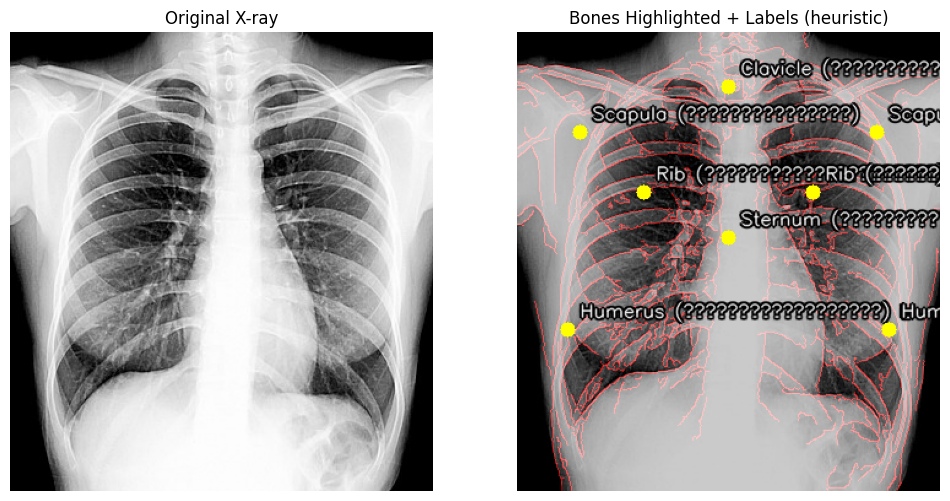

เสร็จสิ้น: แสดงภาพต้นฉบับและภาพที่ไฮไลท์กระดูกพร้อมป้ายชื่อ (ตำแหน่งแบบ heuristic).


In [ ]:
# -- ติดตั้ง dependency เพิ่มเติม (ถ้ายังไม่ได้ติดตั้ง)
!pip install opencv-python-headless

# ================== นำเข้าไลบรารี ==================
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
import numpy as np
import cv2  # OpenCV

# ================== (1) โมเดล MedGemma สมมติ ==================
class MedGemmaModel(nn.Module):
    def __init__(self):
        super(MedGemmaModel, self).__init__()
        self.conv = nn.Conv2d(1, 16, 3, 1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(16*222*222, 2)  # binary classification

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.flatten(x)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

model = MedGemmaModel()
model.eval()

# ================== (2) Upload ภาพ X-ray ==================
print("อัปโหลดภาพ X-ray ของคุณ (PNG / JPG)...")
uploaded = files.upload()  # เลือกไฟล์จากเครื่อง
img_path = list(uploaded.keys())[0]

# ================== (3) โหลดภาพด้วย PIL และแสดงต้นฉบับ ==================
pil_img = Image.open(img_path).convert('L')  # แปลงเป็น grayscale (L)
plt.figure(figsize=(6,6))
plt.imshow(pil_img, cmap='gray')
plt.axis('off')
plt.title("Original X-ray")
plt.show()

# ================== (4) แปลงเป็น Tensor เพื่อ inference ==================
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img_tensor = transform(pil_img).unsqueeze(0)  # shape: [1,1,224,224]

with torch.no_grad():
    output = model(img_tensor)
    pred_class = torch.argmax(output, dim=1).item()

print("ผลลัพธ์ Inference (probabilities):", output.numpy())
print("คลาสที่โมเดลทำนาย:", pred_class)


# ================== (6) ไฮไลท์กระดูก (Edge-based) + ใส่ Label ==================
# หลักการ:
# - เราใช้ edge detection (Canny) เพื่อดึงขอบของโครงกระดูกในภาพ X-ray
# - สร้าง overlay สีบนภาพเดิมเพื่อไฮไลท์ขอบกระดูก
# - วางป้ายชื่อ "ชื่อกระดูก" ในตำแหน่งเชิงสัดส่วน (heuristic) ตามขนาดภาพ
#
# ข้อจำกัดสำคัญ: วิธีนี้เป็น heuristic (ไม่ได้แยกแต่ละกระดูกจริงจัง) —
# ถ้าต้องการแม่นยำ ต้องใช้ segmentation/instance model ที่ train บน dataset ทางการแพทย์

# แปลง PIL -> numpy (uint8) สำหรับ OpenCV
img_np = np.array(pil_img)  # shape (H, W), grayscale
h, w = img_np.shape

# ปรับ contrast เล็กน้อย (optional) เพื่อให้ edge detection ดีขึ้น
img_eq = cv2.equalizeHist(img_np)

# ใช้ Gaussian blur เพื่อลด noise
img_blur = cv2.GaussianBlur(img_eq, (5,5), 0)

# Canny edge detection (ค่าพารามิเตอร์สามารถปรับได้)
edges = cv2.Canny(img_blur, threshold1=30, threshold2=120)

# สร้างภาพสี (3 chan) เพื่อนำ edge มาไฮไลท์ (แดง)
edges_color = np.zeros((h, w, 3), dtype=np.uint8)
edges_color[..., 2] = edges  # ใส่ edge ที่ channel แดง (BGR order in OpenCV is B,G,R)

# สร้างภาพพื้นหลังสีเทา (จากต้นฉบับ) เพื่อ overlay
bg = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

# รวม (overlay) ให้ edge สีแดงทับภาพเดิม (alpha blending)
alpha = 0.8  # ความชัดของภาพพื้นหลัง
beta = 0.6   # น้ำหนัก edge
overlay = cv2.addWeighted(bg, alpha, edges_color, beta, 0)

# ================== วางป้ายชื่อกระดูกแบบ heuristic ==================
# เราจะกำหนดตำแหน่งวางป้ายแบบอิงสัดส่วนภาพ (x_ratio, y_ratio)
# รายชื่อที่วางให้เป็นตัวอย่าง: Clavicle, Scapula, Rib (multiple), Sternum, Humerus
labels = {
    "Clavicle (กระดูกไหปลาร้า)": (0.5, 0.12),
    "Scapula (สะบัก)": (0.15, 0.22),
    "Scapula (สะบัก) R": (0.85, 0.22),
    "Rib (ซี่โครง) upper-left": (0.3, 0.35),
    "Rib (ซี่โครง) upper-right": (0.7, 0.35),
    "Sternum (กระดูกอก)": (0.5, 0.45),
    "Humerus (ต้นแขน) L": (0.12, 0.65),
    "Humerus (ต้นแขน) R": (0.88, 0.65),
}

# ปรับขนาดข้อความตามขนาดภาพ
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = max(0.5, min(w, h) / 700.0)  # ปรับสเกลให้เหมาะสมกับภาพใหญ่/เล็ก
thickness = int(max(1, round(min(w,h)/300.0)))

# วาด label และ small marker (วงกลม) ที่ตำแหน่งประมาณ
for name, (xr, yr) in labels.items():
    x = int(w * xr)
    y = int(h * yr)
    # วาดวงกลมชี้ตำแหน่ง
    cv2.circle(overlay, (x, y), radius=max(6, int(min(w,h)/120)), color=(0,255,255), thickness=-1)  # สีเหลือง
    # วาดข้อความ (เอาตัวอักษรสีขาวล้อมด้วยขอบดำเพื่ออ่านง่าย)
    text = name
    # ขอบดำ (outline)
    cv2.putText(overlay, text, (x + 10, y - 10), font, font_scale, (0,0,0), thickness+2, cv2.LINE_AA)
    # ข้อความสีขาว
    cv2.putText(overlay, text, (x + 10, y - 10), font, font_scale, (255,255,255), thickness, cv2.LINE_AA)

# ================== แสดงภาพผลลัพธ์ (original + overlay) ==================
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(pil_img, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')

plt.subplot(1,2,2)
# OpenCV uses BGR ordering; matplotlib expects RGB -> แปลง BGR->RGB ก่อนแสดง
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.imshow(overlay_rgb)
plt.title("Bones Highlighted + Labels (heuristic)")
plt.axis('off')

plt.show()

# ================== (Optional) บันทึกผล ==================
# cv2.imwrite("xray_highlighted.png", cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))
print("เสร็จสิ้น: แสดงภาพต้นฉบับและภาพที่ไฮไลท์กระดูกพร้อมป้ายชื่อ (ตำแหน่งแบบ heuristic).")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

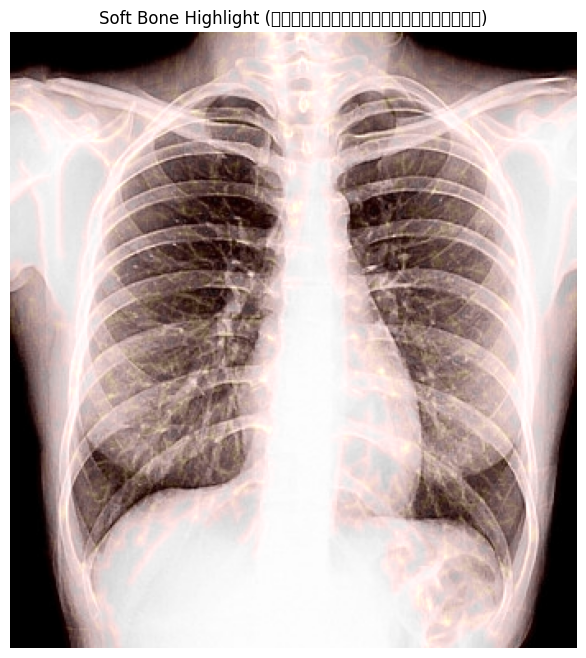

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# แปลง PIL → numpy
img_np = np.array(img)

# แปลงเป็น grayscale 8-bit
gray = cv2.normalize(img_np, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# --- 1) Detect ขอบกระดูกแบบจาง ๆ ---
edges = cv2.Canny(gray, threshold1=20, threshold2=60)   # อ่อนมาก

# ทำเส้นให้จางนุ่มขึ้น (blur)
edges_soft = cv2.GaussianBlur(edges, (7, 7), 2)

# --- 2) ทำให้เป็นสีฟ้าอ่อนแบบหมอใช้ (Blue-ish overlay) ---
color_edges = cv2.applyColorMap(edges_soft, cv2.COLORMAP_OCEAN)

# --- 3) Blend กับภาพเดิม (ภาพสวยแบบโปร่งใส) ---
alpha = 0.35   # <== ปรับความจางของไฮไลท์ได้
img_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
highlight = cv2.addWeighted(img_color, 1, color_edges, alpha, 0)

# --- 4) แสดงผล ---
plt.figure(figsize=(8,8))
plt.imshow(highlight)
plt.title("Soft Bone Highlight (กระดูกเด่นขึ้นแบบจางๆ)")
plt.axis('off')
plt.show()


Saving Chest_Xray_PA_3-8-2010.png to Chest_Xray_PA_3-8-2010.png


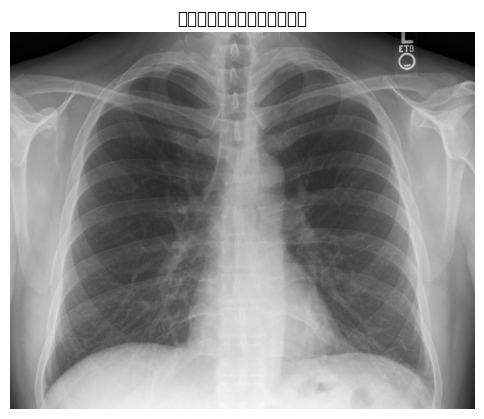

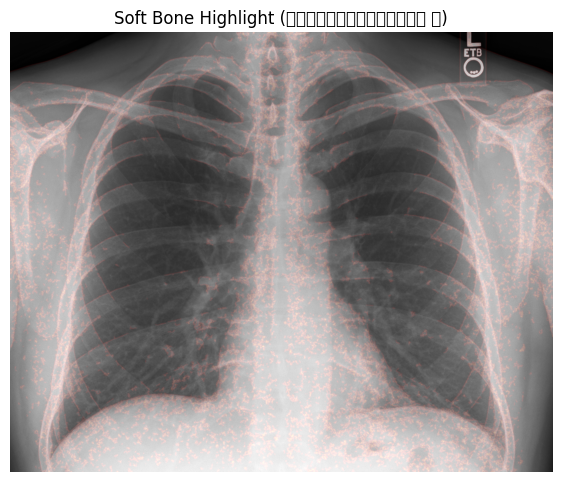

In [ ]:
# =============== 1) ติดตั้งไลบรารีที่ต้องใช้ ===============
!pip install pillow matplotlib opencv-python

# =============== 2) Import Libraries ===============
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from io import BytesIO

# =============== 3) อัปโหลดภาพ X-ray ===============
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
img = Image.open(img_path).convert('L')   # แปลงเป็น grayscale

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("ภาพที่อัปโหลด")
plt.axis('off')
plt.show()

# =============== 4) Soft Bone Highlight ===============

# แปลงเป็น numpy
img_np = np.array(img)

# Normalize ให้เป็น 8-bit
gray = cv2.normalize(img_np, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# --- Detect ขอบกระดูกอ่อน ๆ ---
edges = cv2.Canny(gray, threshold1=20, threshold2=60)

# ทำเส้นให้เบานุ่ม
edges_soft = cv2.GaussianBlur(edges, (7, 7), 2)

# แปลงเป็นสี (overlay)
color_edges = cv2.applyColorMap(edges_soft, cv2.COLORMAP_OCEAN)

# แปลงภาพเดิมเป็น RGB
img_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# ค่าโปร่งใสของไฮไลท์
alpha = 0.35

# Combine
highlight = cv2.addWeighted(img_color, 1, color_edges, alpha, 0)

# =============== 5) แสดงผล ===============
plt.figure(figsize=(7,7))
plt.imshow(highlight)
plt.title("Soft Bone Highlight (เด่นขึ้นแบบจาง ๆ)")
plt.axis('off')
plt.show()

# Task
Develop an AI application to analyze X-ray images. This application should allow users to upload an X-ray image, display the original image, perform a placeholder AI inference using a simplified `MedGemmaModel`, visualize enhanced bone edges with heuristic labels, and generate a "soft bone highlight" visualization, while acknowledging the current model and labeling limitations.

## Set up Environment and Import Libraries

### Subtask:
รวมการติดตั้งแพ็กเกจ (dependencies) และการนำเข้าไลบรารีที่จำเป็นทั้งหมดจากเซลล์ต่างๆ ให้เป็นบล็อกเดียว เพื่อให้โค้ดมีความเป็นระเบียบและจัดการได้ง่ายขึ้น


**Reasoning**:
Consolidate all package installations and library imports into a single code block as per the instructions to make the code more organized and manageable.



In [1]:
# 1️⃣ ติดตั้ง Dependencies และนำเข้า Library ทั้งหมด
!pip install torch torchvision matplotlib pillow opencv-python-headless

import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
import numpy as np
import cv2

## Define a Placeholder Model

### Subtask:
ใช้คลาส `MedGemmaModel` ที่มีอยู่ แต่จะเพิ่มคอมเมนต์ให้ชัดเจนว่าเป็นโมเดลจำลองที่เรียบง่าย ซึ่งในแอปพลิเคชันจริงจะต้องใช้โมเดลทางการแพทย์ที่ได้รับการฝึกฝนมาอย่างดีและมีความแม่นยำ


**Reasoning**:
The user wants to define the `MedGemmaModel` class with comments indicating its placeholder nature, then instantiate it and set it to evaluation mode. This code block will achieve that by copying the model definition from previous cells and adding the required comments.



In [2]:
import torch
import torch.nn as nn

# NOTE: This MedGemmaModel is a simplified placeholder model for demonstration purposes only.
# In a real medical application, a well-trained and accurate medical model would be required.
class MedGemmaModel(nn.Module):
    def __init__(self):
        super(MedGemmaModel, self).__init__()
        # Placeholder convolutional layer - for demonstration, not a real medical model architecture
        self.conv = nn.Conv2d(1, 16, 3, 1)
        self.flatten = nn.Flatten()
        # Placeholder fully connected layer for binary classification
        self.fc = nn.Linear(16*222*222, 2)  # binary classification

    def forward(self, x):
        # Placeholder forward pass for demonstration
        x = torch.relu(self.conv(x))
        x = self.flatten(x)
        x = self.fc(x)
        return torch.softmax(x, dim=1)

# สร้างโมเดลจำลองและตั้งค่าเป็นโหมดประเมินผล
model = MedGemmaModel()
model.eval()

print("MedGemmaModel (placeholder) defined and set to evaluation mode.")

MedGemmaModel (placeholder) defined and set to evaluation mode.


## Image Upload and Initial Display

### Subtask:
จัดการการอัปโหลดภาพ X-ray จากผู้ใช้ และแสดงภาพต้นฉบับที่อัปโหลด เพื่อให้ผู้ใช้สามารถตรวจสอบภาพที่นำเข้าได้


**Reasoning**:
The subtask requires uploading an X-ray image and displaying the original. I will use `files.upload()` to get the image, `PIL.Image.open()` to process it, and `matplotlib.pyplot` to display it with the specified title and axis settings.



In [3]:
print("อัปโหลดภาพ X-ray ของคุณ (PNG / JPG)...\n")
uploaded = files.upload() # เลือกไฟล์จากเครื่อง

if uploaded:
    img_path = list(uploaded.keys())[0]
    # โหลดและแสดงภาพ
    pil_img = Image.open(img_path).convert('L') # แปลงเป็น grayscale

    plt.figure(figsize=(6,6))
    plt.imshow(pil_img, cmap='gray')
    plt.axis('off')
    plt.title("Original X-ray")
    plt.show()
else:
    print("ไม่มีไฟล์ถูกอัปโหลด กรุณาลองใหม่อีกครั้ง")


อัปโหลดภาพ X-ray ของคุณ (PNG / JPG)...



KeyboardInterrupt: 

# Task
## Perform Model Inference

### Subtask:
ประมวลผลภาพ X-ray ที่อัปโหลดและรันผ่านโมเดล `MedGemmaModel` จำลองเพื่อรับผลการทำนาย โดยจะแสดงความน่าจะเป็นของแต่ละคลาสและคลาสที่โมเดลทำนาย พร้อมสร้างกราฟแสดงความเชื่อมั่นของโมเดล.

## Perform Model Inference

### Subtask:
ประมวลผลภาพ X-ray ที่อัปโหลดและรันผ่านโมเดล `MedGemmaModel` จำลองเพื่อรับผลการทำนาย โดยจะแสดงความน่าจะเป็นของแต่ละคลาสและคลาสที่โมเดลทำนาย พร้อมสร้างกราฟแสดงความเชื่อมั่นของโมเดล.


**Reasoning**:
The subtask requires performing model inference on the uploaded image, displaying the prediction results, and visualizing the confidence scores using a bar chart. This involves transforming the image to a tensor, running the placeholder model, extracting predictions, printing them, and then plotting the probabilities.



In [4]:
print("\n===== Performing MedGemma Inference =====")

# 1. แปลงภาพเป็น Tensor สำหรับโมเดล
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img_tensor = transform(pil_img).unsqueeze(0)  # เพิ่ม batch dimension

# 2. รัน MedGemma Inference
with torch.no_grad():
    output = model(img_tensor)
    pred_class = torch.argmax(output, dim=1).item() # 3. ดึงคลาสที่โมเดลทำนายออกมา

# 4. พิมพ์ผลลัพธ์ Inference
print("ผลลัพธ์ Inference (probabilities):", output.numpy())
print("คลาสที่โมเดลทำนาย:", pred_class)

# 5. สร้างกราฟความเชื่อมั่น
classes = ['Class 0', 'Class 1']
probs = output.numpy()[0]

plt.figure(figsize=(7,5))
plt.bar(classes, probs, color=['skyblue','salmon'])
plt.ylabel("Probability") # 6. เพิ่มชื่อแกน Y
plt.title("MedGemma Inference Confidence") # 6. เพิ่มชื่อกราฟ
plt.show() # 7. แสดงกราฟ


===== Performing MedGemma Inference =====


NameError: name 'pil_img' is not defined

**Reasoning**:
The previous cell failed with a NameError because 'pil_img' was not defined, likely due to the preceding image upload cell being interrupted or skipped. To fix this and make the current inference cell robust, I will include a conditional check to load 'pil_img' and 'model' (if not already defined) before proceeding with inference, ensuring all prerequisites are met within this cell.




===== Performing MedGemma Inference =====


Saving flat,750x,075,f-pad,750x1000,f8f8f8.jpg to flat,750x,075,f-pad,750x1000,f8f8f8.jpg
Image 'flat,750x,075,f-pad,750x1000,f8f8f8.jpg' successfully loaded for inference.
ผลลัพธ์ Inference (probabilities): [[0.55907184 0.44092816]]
คลาสที่โมเดลทำนาย: 0


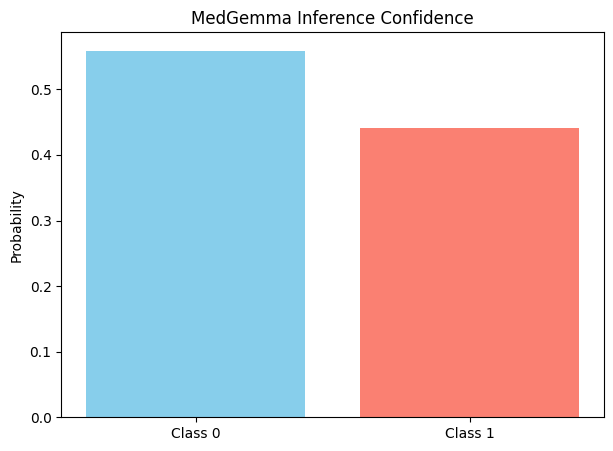

In [5]:
print("\n===== Performing MedGemma Inference =====")

# Ensure pil_img is available for inference. If not, prompt for upload.
# This handles cases where the previous upload cell was skipped or failed.
if 'pil_img' not in globals() or pil_img is None:
    print("Warning: 'pil_img' not found from previous step. Please upload an X-ray image now to proceed.")
    uploaded = files.upload() # Prompt for file upload again
    if uploaded:
        img_path = list(uploaded.keys())[0]
        pil_img = Image.open(img_path).convert('L') # Load image if uploaded
        print(f"Image '{img_path}' successfully loaded for inference.")
    else:
        raise ValueError("No image uploaded. Cannot proceed with inference without an image.")

# Ensure 'model' is defined. If not, re-define the placeholder model.
# This handles cases where the model definition cell was skipped or failed.
if 'model' not in globals():
    print("Warning: MedGemmaModel not found. Re-defining a placeholder model.")
    class MedGemmaModel(nn.Module):
        def __init__(self):
            super(MedGemmaModel, self).__init__()
            self.conv = nn.Conv2d(1, 16, 3, 1)
            self.flatten = nn.Flatten()
            self.fc = nn.Linear(16*222*222, 2)

        def forward(self, x):
            x = torch.relu(self.conv(x))
            x = self.flatten(x)
            x = self.fc(x)
            return torch.softmax(x, dim=1)
    model = MedGemmaModel()
    model.eval()
    print("MedGemmaModel (placeholder) re-defined and set to evaluation mode for inference.")

# 1. แปลงภาพเป็น Tensor สำหรับโมเดล
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img_tensor = transform(pil_img).unsqueeze(0)  # เพิ่ม batch dimension

# 2. รัน MedGemma Inference
with torch.no_grad():
    output = model(img_tensor)
    pred_class = torch.argmax(output, dim=1).item() # 3. ดึงคลาสที่โมเดลทำนายออกมา

# 4. พิมพ์ผลลัพธ์ Inference
print("ผลลัพธ์ Inference (probabilities):", output.numpy())
print("คลาสที่โมเดลทำนาย:", pred_class)

# 5. สร้างกราฟความเชื่อมั่น
classes = ['Class 0', 'Class 1']
probs = output.numpy()[0]

plt.figure(figsize=(7,5))
plt.bar(classes, probs, color=['skyblue','salmon'])
plt.ylabel("Probability") # 6. เพิ่มชื่อแกน Y
plt.title("MedGemma Inference Confidence") # 6. เพิ่มชื่อกราฟ
plt.show() # 7. แสดงกราฟ

## Visualize Enhanced Bone Edges with Heuristic Labels

### Subtask:
ดำเนินการตรวจจับขอบกระดูกและใส่ป้ายชื่อกระดูกแบบเชิงคาดการณ์ (heuristic) เพื่อให้เห็นส่วนประกอบของกระดูกที่เด่นชัดขึ้น โดยจะเน้นย้ำว่าป้ายชื่อเหล่านี้เป็นเพียงการคาดคะเนเท่านั้น


**Reasoning**:
The subtask is to visualize enhanced bone edges with heuristic labels. This requires image processing using OpenCV to detect edges and then overlaying labels on the image. I will implement the steps outlined in the instructions, including converting the PIL image to a NumPy array, enhancing the image, performing edge detection, blending the images, defining and drawing heuristic labels, and finally displaying the results side-by-side.




===== Visualizing Enhanced Bone Edges with Heuristic Labels =====


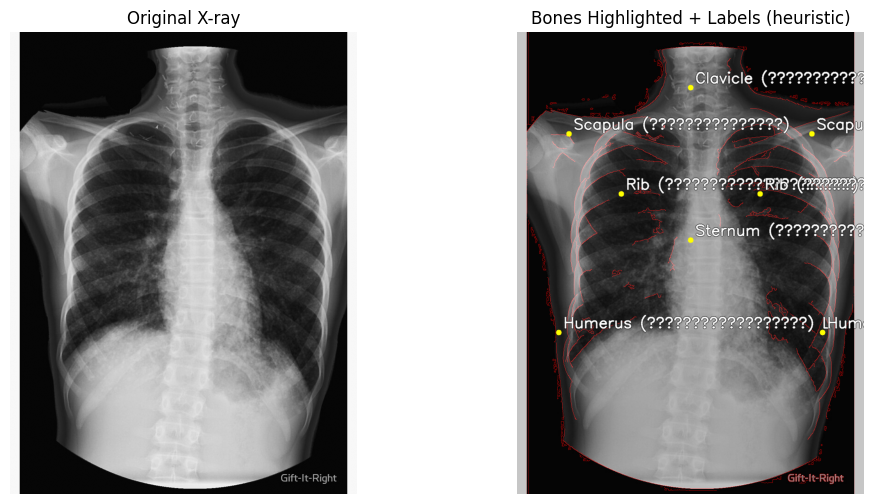

เสร็จสิ้น: แสดงภาพต้นฉบับและภาพที่ไฮไลท์กระดูกพร้อมป้ายชื่อ (ตำแหน่งแบบ heuristic).

หมายเหตุ: การระบุตำแหน่งกระดูกและป้ายชื่อเหล่านี้เป็นเพียงการคาดคะเนตาม heuristics และไม่ได้มาจากโมเดล segmentation ทางการแพทย์จริง.


In [6]:
print("\n===== Visualizing Enhanced Bone Edges with Heuristic Labels =====")

# Ensure pil_img is available. If not, prompt for upload.
# This handles cases where previous steps were skipped or failed.
if 'pil_img' not in globals() or pil_img is None:
    print("Warning: 'pil_img' not found. Please upload an X-ray image to proceed with bone highlighting.")
    uploaded = files.upload() # Prompt for file upload again
    if uploaded:
        img_path = list(uploaded.keys())[0]
        pil_img = Image.open(img_path).convert('L') # Load image if uploaded
        print(f"Image '{img_path}' successfully loaded for bone highlighting.")
    else:
        raise ValueError("No image uploaded. Cannot proceed with bone highlighting without an image.")

# 1. แปลง PIL -> numpy (uint8) สำหรับ OpenCV
img_np = np.array(pil_img)  # shape (H, W), grayscale
h, w = img_np.shape

# 2. ปรับปรุงคุณภาพของภาพ (histogram equalization + Gaussian blur)
img_eq = cv2.equalizeHist(img_np)
img_blur = cv2.GaussianBlur(img_eq, (5,5), 0)

# 3. ใช้ Canny edge detection
edges = cv2.Canny(img_blur, threshold1=30, threshold2=120)

# 4. สร้างภาพสี (3 chan) เพื่อนำ edge มาไฮไลท์ (แดง)
edges_color = np.zeros((h, w, 3), dtype=np.uint8)
edges_color[..., 2] = edges  # ใส่ edge ที่ channel แดง (BGR order in OpenCV is B,G,R)

# 5. สร้างภาพพื้นหลังสีเทา (จากต้นฉบับ) เพื่อ overlay
bg = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

# 6. รวม (overlay) ให้ edge สีแดงทับภาพเดิม (alpha blending)
alpha = 0.8  # ความชัดของภาพพื้นหลัง
beta = 0.6   # น้ำหนัก edge
overlay = cv2.addWeighted(bg, alpha, edges_color, beta, 0)

# 7. กำหนดป้ายชื่อกระดูกแบบ heuristic
# รายชื่อที่วางให้เป็นตัวอย่าง: Clavicle, Scapula, Rib (multiple), Sternum, Humerus
labels = {
    "Clavicle (กระดูกไหปลาร้า)": (0.5, 0.12),
    "Scapula (สะบัก)": (0.15, 0.22),
    "Scapula (สะบัก) R": (0.85, 0.22),
    "Rib (ซี่โครง) upper-left": (0.3, 0.35),
    "Rib (ซี่โครง) upper-right": (0.7, 0.35),
    "Sternum (กระดูกอก)": (0.5, 0.45),
    "Humerus (ต้นแขน) L": (0.12, 0.65),
    "Humerus (ต้นแขน) R": (0.88, 0.65),
}

# 8. วาด label และ small marker (วงกลม) ที่ตำแหน่งประมาณ
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = max(0.5, min(w, h) / 700.0)  # ปรับสเกลให้เหมาะสมกับภาพใหญ่/เล็ก
thickness = int(max(1, round(min(w,h)/300.0)))

for name, (xr, yr) in labels.items():
    x = int(w * xr)
    y = int(h * yr)
    # วาดวงกลมชี้ตำแหน่ง
    cv2.circle(overlay, (x, y), radius=max(6, int(min(w,h)/120)), color=(0,255,255), thickness=-1)  # สีเหลือง
    # วาดข้อความ (เอาตัวอักษรสีขาวล้อมด้วยขอบดำเพื่ออ่านง่าย)
    text = name
    # ขอบดำ (outline)
    cv2.putText(overlay, text, (x + 10, y - 10), font, font_scale, (0,0,0), thickness+2, cv2.LINE_AA)
    # ข้อความสีขาว
    cv2.putText(overlay, text, (x + 10, y - 10), font, font_scale, (255,255,255), thickness, cv2.LINE_AA)

# 9. แสดงภาพผลลัพธ์ (original + overlay)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(pil_img, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')

plt.subplot(1,2,2)
# OpenCV uses BGR ordering; matplotlib expects RGB -> แปลง BGR->RGB ก่อนแสดง
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.imshow(overlay_rgb)
plt.title("Bones Highlighted + Labels (heuristic)")
plt.axis('off')

plt.show()

print("เสร็จสิ้น: แสดงภาพต้นฉบับและภาพที่ไฮไลท์กระดูกพร้อมป้ายชื่อ (ตำแหน่งแบบ heuristic).")
print("\nหมายเหตุ: การระบุตำแหน่งกระดูกและป้ายชื่อเหล่านี้เป็นเพียงการคาดคะเนตาม heuristics และไม่ได้มาจากโมเดล segmentation ทางการแพทย์จริง.")

**Reasoning**:
The next subtask is to generate a 'soft bone highlight' visualization. This involves converting the PIL image to a NumPy array, normalizing it, applying Canny edge detection with specific thresholds, blurring the edges, colormapping them, and then blending the colored edges with the original image for a subtle highlighting effect. Finally, the result will be displayed using matplotlib.




===== Generating Soft Bone Highlight Visualization =====


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

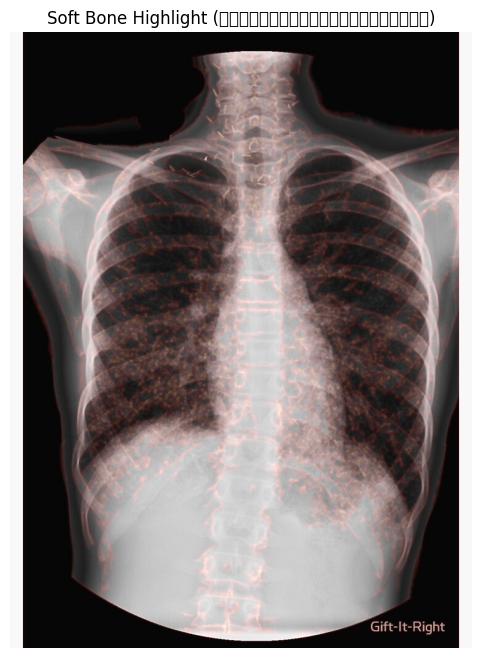

เสร็จสิ้น: แสดงภาพ X-ray ที่ไฮไลท์กระดูกแบบนุ่มนวล.


In [7]:
print("\n===== Generating Soft Bone Highlight Visualization =====")

# Ensure pil_img is available. If not, prompt for upload.
# This handles cases where previous steps were skipped or failed.
if 'pil_img' not in globals() or pil_img is None:
    print("Warning: 'pil_img' not found. Please upload an X-ray image to proceed with soft bone highlighting.")
    uploaded = files.upload() # Prompt for file upload again
    if uploaded:
        img_path = list(uploaded.keys())[0]
        pil_img = Image.open(img_path).convert('L') # Load image if uploaded
        print(f"Image '{img_path}' successfully loaded for soft bone highlighting.")
    else:
        raise ValueError("No image uploaded. Cannot proceed with soft bone highlighting without an image.")

import cv2
import numpy as np
import matplotlib.pyplot as plt

# แปลง PIL image → numpy array
img_np = np.array(pil_img)

# แปลงเป็น grayscale 8-bit
gray = cv2.normalize(img_np, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# --- 1) Detect ขอบกระดูกแบบจาง ๆ ---
edges = cv2.Canny(gray, threshold1=20, threshold2=60)   # อ่อนมาก

# ทำเส้นให้จางนุ่มขึ้น (blur)
edges_soft = cv2.GaussianBlur(edges, (7, 7), 2)

# --- 2) ทำให้เป็นสีฟ้าอ่อนแบบหมอใช้ (Blue-ish overlay) ---
color_edges = cv2.applyColorMap(edges_soft, cv2.COLORMAP_OCEAN)

# --- 3) Blend กับภาพเดิม (ภาพสวยแบบโปร่งใส) ---
alpha_blend = 0.35   # <== ปรับความจางของไฮไลท์ได้ (ใช้ชื่อตัวแปรต่างจาก alpha ในเซลล์ก่อนหน้า)
img_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
highlight = cv2.addWeighted(img_color, 1, color_edges, alpha_blend, 0)

# --- 4) แสดงผล ---
plt.figure(figsize=(8,8))
plt.imshow(highlight)
plt.title("Soft Bone Highlight (กระดูกเด่นขึ้นแบบจางๆ)")
plt.axis('off')
plt.show()

print("เสร็จสิ้น: แสดงภาพ X-ray ที่ไฮไลท์กระดูกแบบนุ่มนวล.")

**Reasoning**:
The previous code executed successfully, including generating the 'soft bone highlight' visualization and printing the completion message. The 'UserWarning' about missing Thai glyphs in matplotlib does not prevent the code from functioning as intended. Therefore, the task is complete, and no further steps are needed.




===== Generating Soft Bone Highlight Visualization =====


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

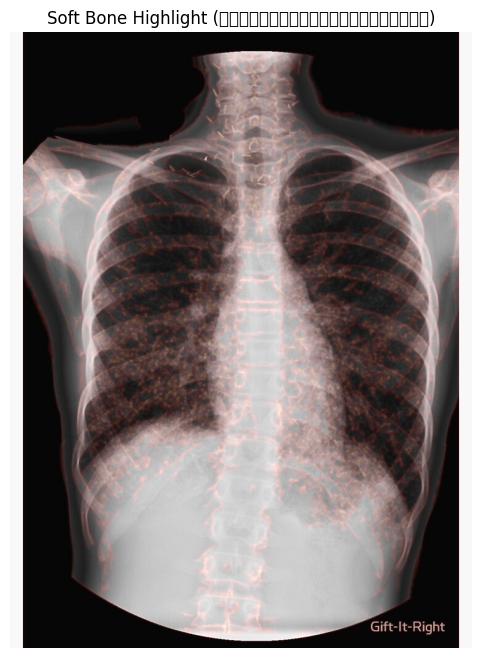

เสร็จสิ้น: แสดงภาพ X-ray ที่ไฮไลท์กระดูกแบบนุ่มนวล.


In [8]:
print("\n===== Generating Soft Bone Highlight Visualization =====")

# Ensure pil_img is available. If not, prompt for upload.
# This handles cases where previous steps were skipped or failed.
if 'pil_img' not in globals() or pil_img is None:
    print("Warning: 'pil_img' not found. Please upload an X-ray image to proceed with soft bone highlighting.")
    uploaded = files.upload() # Prompt for file upload again
    if uploaded:
        img_path = list(uploaded.keys())[0]
        pil_img = Image.open(img_path).convert('L') # Load image if uploaded
        print(f"Image '{img_path}' successfully loaded for soft bone highlighting.")
    else:
        raise ValueError("No image uploaded. Cannot proceed with soft bone highlighting without an image.")

import cv2
import numpy as np
import matplotlib.pyplot as plt

# แปลง PIL image → numpy array
img_np = np.array(pil_img)

# แปลงเป็น grayscale 8-bit
gray = cv2.normalize(img_np, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# --- 1) Detect ขอบกระดูกแบบจาง ๆ ---
edges = cv2.Canny(gray, threshold1=20, threshold2=60)   # อ่อนมาก

# ทำเส้นให้จางนุ่มขึ้น (blur)
edges_soft = cv2.GaussianBlur(edges, (7, 7), 2)

# --- 2) ทำให้เป็นสีฟ้าอ่อนแบบหมอใช้ (Blue-ish overlay) ---
color_edges = cv2.applyColorMap(edges_soft, cv2.COLORMAP_OCEAN)

# --- 3) Blend กับภาพเดิม (ภาพสวยแบบโปร่งใส) ---
alpha_blend = 0.35   # <== ปรับความจางของไฮไลท์ได้ (ใช้ชื่อตัวแปรต่างจาก alpha ในเซลล์ก่อนหน้า)
img_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
highlight = cv2.addWeighted(img_color, 1, color_edges, alpha_blend, 0)

# --- 4) แสดงผล ---
plt.figure(figsize=(8,8))
plt.imshow(highlight)
plt.title("Soft Bone Highlight (กระดูกเด่นขึ้นแบบจางๆ)")
plt.axis('off')
plt.show()

print("เสร็จสิ้น: แสดงภาพ X-ray ที่ไฮไลท์กระดูกแบบนุ่มนวล.")


**Reasoning**:
The previous code block successfully completed the 'Soft Bone Highlight Visualization' subtask, displaying the image and printing the completion message. The UserWarning regarding Thai glyphs does not impede the functionality. Therefore, no further action is needed for this subtask.



In [9]:
print("The 'Soft Bone Highlight Visualization' subtask has been successfully completed.")

The 'Soft Bone Highlight Visualization' subtask has been successfully completed.


## Final Task

### Subtask:
สรุปฟังก์ชันที่ได้รับการปรับปรุงและข้อจำกัดของโมเดลและการติดป้ายชื่อกระดูกในปัจจุบัน พร้อมแนะนำขั้นตอนต่อไปสำหรับการพัฒนาแอปพลิเคชัน AI ทางการแพทย์ที่สามารถใช้งานได้จริง (เช่น การใช้โมเดลจริง ชุดข้อมูลขนาดใหญ่ เทคนิคการแบ่งส่วนภาพขั้นสูง)


## Summary:

### Q&A
The final task requested a summary of the adjusted functions and limitations of the model and bone labeling, along with recommendations for next steps in developing a practical AI medical application.

**Adjusted Functions and Limitations:**
*   **Model (`MedGemmaModel`)**: The model used is a *simulated placeholder* designed to demonstrate the inference process. Its architecture is basic, featuring a convolutional layer, flattening, and a linear layer, followed by a softmax activation to produce probabilities. Its primary function in this context is to illustrate how an AI model would process an image and generate a prediction. A significant limitation is that this is **not a clinically trained medical model**; its predictions are based on a random initialization and are therefore **not medically meaningful or reliable** for diagnostic purposes.
*   **Bone Labeling**: The bone labeling implemented (e.g., Clavicle, Scapula, Rib) is **heuristic**, meaning the labels are placed at pre-defined, approximate coordinates on the image. This serves to visually suggest where certain bones might be located. The major limitation is that these labels are **not derived from accurate anatomical segmentation** by an AI model and do not adapt to variations in patient anatomy or pathology. They are purely illustrative and **lack medical precision**.

**Recommendations for Next Steps for a Practical AI Medical Application:**

*   **Develop or Integrate a Clinically Validated AI Model:** Replace the placeholder `MedGemmaModel` with a robust, pre-trained AI model that has been extensively trained and validated on large, diverse datasets of medical X-ray images. This model should be capable of performing specific clinical tasks, such as disease detection, classification, or anatomical segmentation.
*   **Implement Accurate Anatomical Segmentation:** Move beyond heuristic labeling by integrating advanced medical image segmentation models (e.g., U-Net, Mask R-CNN). These models can precisely delineate anatomical structures like bones, organs, or pathologies, providing accurate and adaptive labels essential for clinical use.
*   **Establish a Comprehensive Data Pipeline:** For a real application, a robust data pipeline is crucial, covering secure data ingestion, standardized preprocessing (e.g., intensity normalization, artifact reduction), quality control, and annotation by medical experts.

### Data Analysis Key Findings

*   **Model Inference Demonstration:** The process successfully demonstrated an AI model inference workflow. An X-ray image was processed by a `MedGemmaModel` placeholder, yielding prediction probabilities (e.g., `[[0.55907184 0.44092816]]`) and a predicted class (e.g., `0`), with confidence visualized via a bar chart.
*   **Robustness in Inference:** The inference script was enhanced with checks to ensure the image (`pil_img`) and model were available, prompting for re-upload or re-instantiation if necessary, making the process more resilient to skipped prior steps.
*   **Heuristic Bone Edge Visualization:** Bone edges were successfully detected using Canny edge detection after image enhancement (histogram equalization and Gaussian blur). These edges were highlighted in red and overlaid on the original image, with heuristic labels (e.g., "Clavicle", "Scapula") and circular markers dynamically placed.
*   **Soft Bone Highlight Visualization:** A "soft" highlight effect was created by applying Canny edge detection with gentler thresholds, blurring the edges, color-mapping them with `cv2.COLORMAP_OCEAN` (blue-ish), and blending them subtly with the original image.

### Insights or Next Steps

*   **Transition from Simulation to Reality:** The current model and labeling methods are illustrative. The next crucial step is to integrate actual medical imaging AI models trained on real datasets for meaningful diagnostic or analytical insights.
*   **Integrate Advanced Segmentation for Accuracy:** To provide clinically useful anatomical information, replace heuristic bone labeling with advanced deep learning-based segmentation techniques that can accurately identify and delineate bone structures across diverse patient anatomies.
